In [2]:
import pandas as pd, numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# MPL Settings
import matplotlib as mpl,  matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

grey = '#808080'
darkgrey = '#505050'
# (http://www.color-hex.com/color/505050)

mpl.rcParams['axes.linewidth'] = 0.3
mpl.rcParams['axes.edgecolor'] = grey
mpl.rcParams['xtick.color'] = grey
mpl.rcParams['ytick.color'] = grey
mpl.rcParams['text.color'] = darkgrey
mpl.rcParams['axes.labelcolor'] = darkgrey
mpl.rcParams["font.family"] = "Arial"
mpl.rcParams['figure.dpi'] = 300

In [4]:
white_house = pd.read_csv("2015_white_house.csv")
print(white_house.shape)

(474, 5)


In [5]:
print(white_house.iloc[0])
print(white_house.tail(1))

Name              Abdullah, Hasan A.
Status                      Detailee
Salary                        105960
Pay Basis                  Per Annum
Position Title        POLICY ADVISOR
Name: 0, dtype: object
                   Name    Status  Salary  Pay Basis  \
473  Zients, Jeffrey D.  Employee  173922  Per Annum   

                                        Position Title  
473  ASSISTANT TO THE PRESIDENT FOR ECONOMIC POLICY...  


In [6]:
white_house.head()

,Name,Status,Salary,Pay Basis,Position Title
0,"Abdullah, Hasan A.",Detailee,105960,Per Annum,POLICY ADVISOR
1,"Abraham, Sabey M.",Employee,55000,Per Annum,ENERGY AND ENVIRONMENT DIRECTOR FOR PRESIDENTI...
2,"Abraham, Yohannes A.",Employee,121200,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND CHIEF O...
3,"Abramson, Jerry E.",Employee,155035,Per Annum,DEPUTY ASSISTANT TO THE PRESIDENT AND DIRECTOR...
4,"Adler, Caroline E.",Employee,114000,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...


(array([  2.,   0., 136.,  93.,  49.,  47.,  53.,  39.,  11.,  44.]),
 array([     0. ,  17392.2,  34784.4,  52176.6,  69568.8,  86961. ,
        104353.2, 121745.4, 139137.6, 156529.8, 173922. ]),
 <a list of 10 Patch objects>)

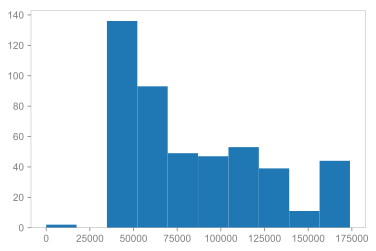

In [7]:
plt.hist(white_house["Salary"])
plt.show()

Dummy White House Stuff

In [8]:
print("Min Sal: ", white_house["Salary"].min())
print("Max Sal: ", white_house["Salary"].max())
print("Mean Sal: ", white_house["Salary"].mean())
print("Median Sal: ", white_house["Salary"].median())
print()
print("Lowest Paid Staffer(s):") 
white_house[white_house["Salary"] == white_house["Salary"].min()][['Name', 'Position Title', 'Salary']]
print()
print("Highest Paid Staffer(s):") 
white_house[white_house["Salary"] == white_house["Salary"].max()][['Name', 'Position Title', 'Salary']]

Min Sal:  0
Max Sal:  173922
Mean Sal:  84864.12447257384
Median Sal:  70700.0

Lowest Paid Staffer(s):


,Name,Position Title,Salary
243,"Leary, Kimberlyn R.",ADVISOR TO THE COUNCIL ON WOMEN AND GIRLS,0
326,"Park, Todd Y.",ADVISOR FOR TECHNOLOGY,0



Highest Paid Staffer(s):


,Name,Position Title,Salary
52,"Breckenridge, Anita J.",ASSISTANT TO THE PRESIDENT AND DEPUTY CHIEF OF...,173922
70,"Canegallo, Kristie A.",ASSISTANT TO THE PRESIDENT AND DEPUTY CHIEF OF...,173922
90,"Cushman, Chase M.",ASSISTANT TO THE PRESIDENT AND DIRECTOR OF SCH...,173922
117,"Earnest, Joshua R.",ASSISTANT TO THE PRESIDENT AND PRESS SECRETARY,173922
121,"Eggleston, Warren N.",ASSISTANT TO THE PRESIDENT AND COUNSEL TO THE ...,173922
130,"Fallon, Katherine B.",ASSISTANT TO THE PRESIDENT AND DIRECTOR OF THE...,173922
200,"Jarrett, Valerie B.",SENIOR ADVISOR AND ASSISTANT TO THE PRESIDENT ...,173922
201,"Johnson, Broderick D.",ASSISTANT TO THE PRESIDENT AND CABINET SECRETARY,173922
210,"Kale, Katy A.",ASSISTANT TO THE PRESIDENT FOR MANAGEMENT AND ...,173922
216,"Keenan, Cody S.",ASSISTANT TO THE PRESIDENT AND DIRECTOR OF SPE...,173922


In [9]:
range(1,10)

range(1, 10)

In [10]:
import math
def roundup(x):
    return int(math.ceil(x / 10000.0)) * 10000

In [11]:
bins = list(range(0, roundup(white_house["Salary"].max()+10000), 10000))

In [12]:
roundup(173922)

180000

Text(0.5,1,'White House Salary Distribution')

Text(0.5,0,'Salary Band')

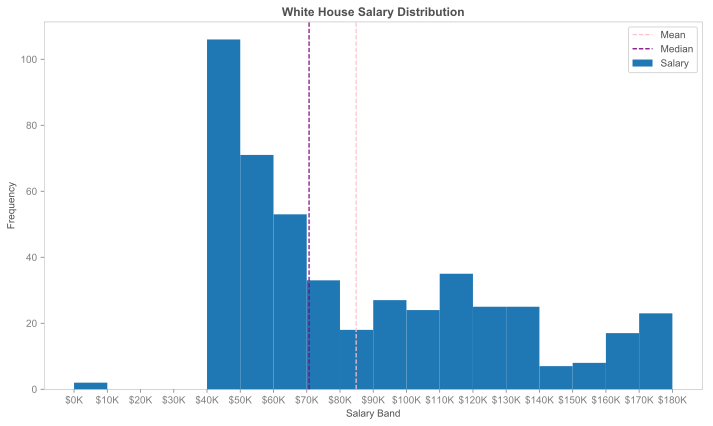

In [51]:
mpl.rc('axes',edgecolor='grey')
ax = white_house['Salary'].plot.hist(bins = bins, figsize=(10,6), rot=0,
                                xticks=bins)
# from matplotlib.ticker import FormatStrFormatter
# plt.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}K'))
def thousands(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fK' % (x*1e-3)

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(thousands)
# ax.get_xaxis().set_major_formatter(
#     mpl.ticker.FuncFormatter(lambda x, p: format(x/1000, '.0f')))
ax.xaxis.set_major_formatter(formatter)
plt.title("White House Salary Distribution",fontweight="bold")
plt.xlabel("Salary Band")
plt.axvline(white_house.Salary.mean(), ls='dashed', lw='1.2', color='pink', label='Mean')
plt.axvline(white_house.Salary.median(), ls='dashed', lw='1.2', color='purple', label='Median')
# plt.axvline(white_house.Salary.mode(), ls='dashed', lw='1.2', color='gray', label='Mode')
plt.legend(loc=0)
plt.tight_layout()
plt.show()

In [ ]:
white_house[white_house["Salary"] == white_house["Salary"].min()][['Name', 'Position Title']]

In [19]:
salary_ticks = ['${}K'.format(b/1000) for b in bins]
salary_ticks

['$0.0K',
 '$10.0K',
 '$20.0K',
 '$30.0K',
 '$40.0K',
 '$50.0K',
 '$60.0K',
 '$70.0K',
 '$80.0K',
 '$90.0K',
 '$100.0K',
 '$110.0K',
 '$120.0K',
 '$130.0K',
 '$140.0K',
 '$150.0K',
 '$160.0K',
 '$170.0K',
 '$180.0K']